In [45]:
from webbrowser import get
import torchtt as tntt
import numpy as np
import tt_iga
import matplotlib.pyplot as plt
import torch as tn
import datetime

tn.set_default_dtype(tn.float64)


In [46]:
def create_geometry( ):
        
    Nt = 24                                                                
    lz = 40e-3                                                             
    Do = 72e-3                                                            
    Di = 51e-3                                                            
    hi = 13e-3                                                             
    bli = 3e-3                                                             
    Dc = 3.27640e-2                                                           
    # Dc = 32e-3
    # hc = 7e-3
    hc = 7.55176e-3                                                           
    ri = 20e-3                                                           
    ra = 18e-3                                                           
    blc = hi-hc                                                           
    rm = (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)                 
    R = rm-ri

    get_rO = lambda Ax,Ay,ri: (Ax**2+Ay**2-ri**2)/(np.sqrt(2)*(Ax+Ay)-2*ri)

    O = np.array([rm/np.sqrt(2),rm/np.sqrt(2)])
    alpha1 = -np.pi*3/4       
    alpha2 = np.math.asin((hc-rm/np.sqrt(2))/R)
    alpha = np.abs(alpha2-alpha1)
    
    A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
    b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
    C = np.linalg.solve(A,b)

    def Cx(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[0]

    def Cy(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),( (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)  )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[1]

    control_points = tt_iga.geometry.ParameterDependentControlPoints([7,5])

    # params ri - 0 , Dc - 1 , Di - 2 
    control_points[:,0,0] = [0,0]
    control_points[:,1,0] = [(Dc)/2, 0]
    control_points[:,2,0] = [(Dc), 0]
    control_points[:,3,0] = [(Dc+Di)/2,0]
    control_points[:,4,0] = [lambda params: Di+params[2],0]
    control_points[:,5,0] = [(Do+Di)/2,0]
    control_points[:,6,0] = [Do,0]
    
    control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    control_points[:,1,1] = [(Cx(ri,Dc,hc)+Dc/2)*0.5, Cy(ri,Dc,hc)*0.5]
    control_points[:,2,1] = [(Dc), hc*0.5]
    control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    control_points[:,6,1] = [Do,(hi-bli)*0.5]

    #control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    #control_points[:,1,1] = [lambda params: (Cx(ri+params[0],Dc+params[1],hc)+(Dc+params[1])/2)*0.5, lambda params: Cy(ri+params[0],Dc+params[1],hc)*0.5]
    #control_points[:,2,1] = [lambda params: (Dc+params[1]), hc*0.5]
    #control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    #control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    #control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    #control_points[:,6,1] = [Do,(hi-bli)*0.5]
    
    control_points[:,0,2] = [lambda params: (ri+params[0])/np.sqrt(2),lambda params: (ri+params[0])/np.sqrt(2)]
    control_points[:,1,2] = [lambda params: Cx(ri+params[0],Dc,hc+params[1]), lambda params: Cy(ri+params[0],Dc,hc+params[1])]
    control_points[:,2,2] = [(Dc), lambda params: hc+params[1]]
    control_points[:,3,2] = [(Dc+Di)/2,0.5*(hi-bli+hc)]
    control_points[:,4,2] = [lambda params: Di+params[2],hi-bli]
    control_points[:,5,2] = [(Do+Di)/2,hi-bli]
    control_points[:,6,2] = [Do,hi-bli]
    
    control_points[:,0,3] = [(0.75*ri+0.25*Do)/np.sqrt(2),(0.75*ri+0.25*Do)/np.sqrt(2)]
    control_points[:,1,3] = [0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+Dc+blc), 0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+hi)]
    control_points[:,2,3] = [Dc+blc,lambda params:  hi+params[3]]
    control_points[:,3,3] = [ 0.5*(Dc+blc+Di-bli),lambda params:  hi+params[3]]
    control_points[:,4,3] = [ Di-bli, lambda params: hi+params[3]]
    control_points[:,5,3] = [lambda params: 0.5*(Di+Do),hi]
    control_points[:,6,3] = [Do,hi]

    control_points[:,0,4] = [Do/np.sqrt(2), Do/np.sqrt(2)]
    control_points[:,1,4] = [Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*(0.5*Dc/Do), Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*np.tan(np.pi/8)*(0.5*Dc/Do)]
    control_points[:,2,4] = [Do/np.sqrt(2)*(1-Dc/Do)+Do*(Dc/Do), Do/np.sqrt(2)*(1-Dc/Do)+Do*np.tan(np.pi/8)*(Dc/Do)]
    control_points[:,3,4] = [Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*(0.5*(Dc+Di)/Do), Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*np.tan(np.pi/8)*(0.5*(Dc+Di)/Do)]
    control_points[:,4,4] = [Do/np.sqrt(2)*(1-Di/Do)+Do*(Di/Do), Do/np.sqrt(2)*(1-Di/Do)+Do*np.tan(np.pi/8)*(Di/Do)]
    control_points[:,5,4] = [Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*(0.5*(Di+Do)/Do), Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*np.tan(np.pi/8)*(0.5*(Di+Do)/Do)]
    control_points[:,6,4] = [Do,Do*np.tan(np.pi/8)]

    weights = tt_iga.geometry.ParameterDependentWeights([7,5])
    weights[...] = 1.0
    alpha2 = lambda params: np.math.asin((hc+params[1]-get_rO(Dc,hc+params[1],ri+params[0])/np.sqrt(2))/(get_rO(Dc,hc+params[1],ri+params[0])-ri-params[0]))
    weights[1,2] = lambda params :  np.sin((np.pi-np.abs(alpha2(params)+np.pi*3/4))/2)
    # weights[1,2] = lambda params :  np.abs(alpha2+np.pi*3/4)
    
    surface_excitation = lambda params: 0.5*(blc-0)*(hi+params[...,3]+hc+params[...,1])+(Di-bli-Dc-blc)*(hi+params[...,3])+0.5*(bli+params[...,2])*(hi+params[...,3]+hi-bli)
    return control_points, weights, surface_excitation

0.0002177263404511999


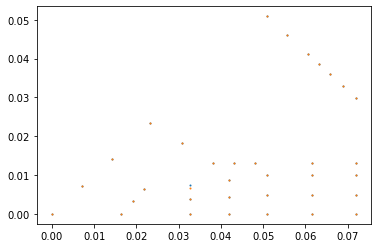

In [47]:
control_points, weights, surface = create_geometry()
print(surface(np.array([0.0,0.0,0.0,0.0])))

var1 = 0.00075
var2 = 0.00075
var3 = 0.00075
var4 = 0.00075

pts = control_points([0,0,0,0])
plt.figure()
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)
pts = control_points([0,-var2,0,0,0])
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)


basis1 = tt_iga.bspline.BSplineBasis(np.array([0,0.4,0.4,0.6,0.6,1]),2)
basis2 = tt_iga.bspline.BSplineBasis(np.array([0,0.15,0.3,0.5,1]),1)
basis = [basis1, basis2]
basis_solution = [tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.4,21), np.linspace(0.4,0.6,21),np.linspace(0.6,1,21))),2)]
basis_solution.append(tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.15,16),np.linspace(0.15,0.3,15), np.linspace(0.3,0.5,15),np.linspace(0.5,1,17))),2))

nl = 10
basis_param = [tt_iga.lagrange.LagrangeLeg(nl,[-var1,var1]), tt_iga.lagrange.LagrangeLeg(nl,[-var2,var2]), tt_iga.lagrange.LagrangeLeg(nl,[-var3,var3]), tt_iga.lagrange.LagrangeLeg(nl,[-var4,var4])]
geom = tt_iga.PatchNURBS.interpolate_parameter_dependent(control_points, weights, basis, basis_param, eps = 1e-13)

# print(geom([tn.tensor([0.2]),tn.tensor([0.3])]+4*[tn.tensor([0.0])])[0].numpy().squeeze())
# print(geom([tn.tensor([0.2]),tn.tensor([0.3])]+4*[tn.tensor([0.0])])[1].numpy().squeeze())
# 
# print(weights(np.zeros((4))))
# print(control_points(np.zeros((4)))[1,:,:])

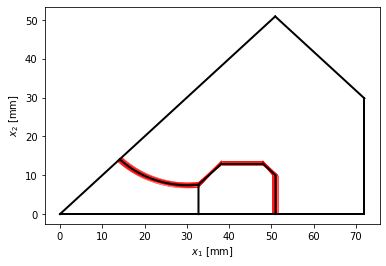

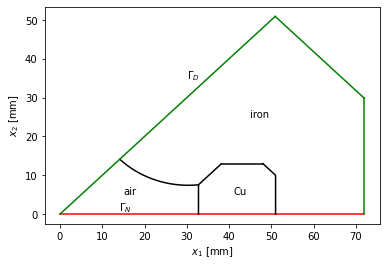

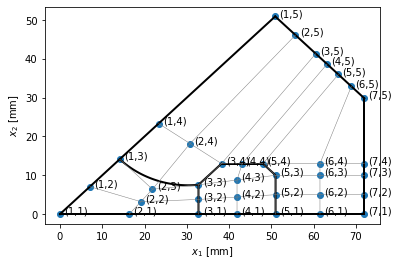

In [48]:
plt.figure()

for i in range(20):
    paramz = [tn.tensor([np.random.uniform()*2*var1-var1]),tn.tensor([np.random.uniform()*2*var2-var2]),tn.tensor([np.random.uniform()*2*var3-var3]),tn.tensor([np.random.uniform()*2*var4-var4])]
    line = geom([tn.linspace(0,0.4,32),tn.tensor([0.3])]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.linspace(0.4,0.6,32),tn.tensor([0.5])]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.linspace(0,1,32),tn.tensor([1])]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.linspace(0,1,32),tn.tensor([0.0])]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)

    # line = geom([tn.tensor([0.0]),tn.linspace(0,1,32)]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.tensor([1.0]),tn.linspace(0,1,32)]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,32)]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,32)]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)

paramz = [tn.tensor([0]), tn.tensor([0]), tn.tensor([0]), tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
import tikzplotlib
# plt.savefig('quad_section.eps')
tikzplotlib.save('quad_params.tex')

plt.figure()
paramz = [tn.tensor([0]), tn.tensor([0]), tn.tensor([0]), tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r')

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
plt.text(0.03*1e3,0.035*1e3,r'$\Gamma_D$')
plt.text(0.014*1e3,0.0008*1e3,r'$\Gamma_N$')
plt.text(0.045*1e3,0.025*1e3,r'iron')
plt.text(0.041*1e3,0.005*1e3,r'Cu')
plt.text(0.015*1e3,0.005*1e3,r'air')
import tikzplotlib
# plt.savefig('quad_section.eps')
tikzplotlib.save('quad_section.tex')

plt.figure()
paramz = [tn.tensor([0]), tn.tensor([0]), tn.tensor([0]), tn.tensor([0])]
line = geom([tn.linspace(0,0.4,32),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0.4,0.6,32),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,32),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,32),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

line = geom([tn.tensor([0.0]),tn.linspace(0,1,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([1.0]),tn.linspace(0,1,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

pts = control_points([0,0,0,0])

plt.scatter(pts[0,...]*1e3, pts[1,...]*1e3)

plt.plot(pts[0,:,1]*1e3, pts[1,:,1]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,:,2]*1e3, pts[1,:,2]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,:,3]*1e3, pts[1,:,3]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,1,:]*1e3, pts[1,1,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,2,:]*1e3, pts[1,2,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,3,:]*1e3, pts[1,3,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,4,:]*1e3, pts[1,4,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,5,:]*1e3, pts[1,5,:]*1e3,'gray',linewidth=0.5)

for i in range(5): 
    for j in range(7): 
        plt.text(pts[0,j,i]*1e3+1,pts[1,j,i]*1e3,'(%d,%d)'%(j+1,i+1), fontsize = 10)

plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
tikzplotlib.save('quad_points.tex')

In [49]:

mu0 = 4*np.pi*1e-7
mur = 1500
mu_ref = lambda y: 1/mu0*((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))+1/(mu0*mur)*tn.logical_not((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))

tme = datetime.datetime.now()
Mass_tt = geom.mass_interp(basis_solution, eps = 1e-10)
tme = datetime.datetime.now() - tme
print('Time mass ', tme)
tme = datetime.datetime.now()
Stiff_tt = geom.stiffness_interp(basis_solution, eps = 1e-10, func_reference=mu_ref, qtt = True, verb = True, device = 'cuda:1')
tme = datetime.datetime.now() - tme
print('Time stiffness ', tme)

Jref = lambda y: 24*45/surface(y[...,2:])*(y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+0.0
# Jref = lambda y: 5000000*(y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+0.0

rhs_tt = geom.rhs_interp(basis_solution,Jref)

P1 = tn.eye(Mass_tt.N[0])
P2 = tn.eye(Mass_tt.N[1])
P2[-1,-1] = 0
P1[0,0] = 0
P1[-1,-1] = 0
Pin_tt = tntt.rank1TT([P1,P2]) ** tntt.eye([nl]*4)
Pbd_tt = (tntt.eye(Mass_tt.N) - Pin_tt) ** tntt.eye([nl]*4) / Mass_tt.N[0]

M_tt = (Pin_tt@Stiff_tt+Pbd_tt).round(1e-10)
rhs_tt = (Pin_tt @ rhs_tt + 0).round(1e-10)

print('System matrix... ',flush=True)

print('Rank Stiff', Stiff_tt.R, ' storage [MB] ',tntt.numel(Stiff_tt)*8/1e6)
print('Rank Mass', Mass_tt.R, ' storage [MB] ',tntt.numel(Mass_tt)*8/1e6)
print('Rank Mtt ',M_tt.R, ' storage [MB] ',tntt.numel(M_tt)*8/1e6)
print('Rank rhstt ',rhs_tt.R, ' storage [MB] ',tntt.numel(rhs_tt)*8/1e6)





Time mass  0:00:02.192421
time omega 0:00:02.222686
rank omega, [1, 19, 29, 18, 4, 2, 1]
QTT enabled:
[240, 236, 10, 10, 10, 10]
  || 
  \/  
[2, 2, 2, 2, 3, 5, 2, 2, 59, 2, 5, 2, 5, 2, 5, 2, 5]
Sweep 1: 
	LR supercore 1,2
		number evaluations 113280
		rank updated 2 -> 6, local error 1.000001e+00
	LR supercore 2,3
		number evaluations 28320
		rank updated 2 -> 4, local error 9.276547e-01
	LR supercore 3,4
		number evaluations 800
		rank updated 2 -> 4, local error 9.967256e-01
	LR supercore 4,5
		number evaluations 800
		rank updated 2 -> 4, local error 1.023115e+00
	LR supercore 5,6
		number evaluations 400
		rank updated 2 -> 4, local error 1.064506e+00
	RL supercore 5,6
		number evaluations 400
		rank updated 4 -> 4, local error 3.645173e-16
	RL supercore 4,5
		number evaluations 1600
		rank updated 4 -> 4, local error 5.210304e-16
	RL supercore 3,4
		number evaluations 1600
		rank updated 4 -> 4, local error 1.227309e-15
	RL supercore 2,3
		number evaluations 56640
		rank updated 

In [50]:
tme = datetime.datetime.now() 
dev_name = 'cuda:1'
# dofs_tt = tntt.solvers.amen_solve(M_tt.cuda(), rhs_tt.cuda(), x0 = tntt.ones(rhs_tt.N).cuda(), eps = eps_solver, nswp = 50, kickrank = 4, preconditioner = 'c', verbose = False).cpu()
# dofs_tt = tntt.reshape(tntt.solvers.amen_solve(tntt.reshape(M_tt,[(2,2)]*21).round(1e-12).cuda(), tntt.reshape(rhs_tt,[2]*21).round(1e-12).cuda(), x0 = tntt.reshape(tntt.ones(rhs_tt.N),[2]*21).cuda(), eps = 1e-6, nswp = 50, kickrank = 32, preconditioner = 'c', verbose = True),rhs_tt.N).round(1e-12)
# dofs_tt = tntt.solvers.amen_solve(M_tt, rhs_tt, x0 = tntt.ones(rhs_tt.N), eps = 1e-7, rmax = 400, nswp = 50, kickrank = 32, preconditioner = 'c', verbose = True).cpu()
dofs_tt = tntt.solvers.amen_solve(M_tt.to(dev_name), rhs_tt.to(dev_name), x0 = tntt.ones(rhs_tt.N).to(dev_name), rmax = 300, eps = 1e-6, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
# dofs_tt = tntt.solvers.amen_solve(tntt.reshape(M_tt,[(8,8)]*8).round(1e-10).cuda(), tntt.reshape(rhs_tt,[8]*8).round(1e-10).cuda(), x0 = tntt.reshape(dofs_tt,[8]*8).round(1e-8).cuda(), rmax = 600, eps = 1e-7, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
# dofs_tt = tntt.reshape(dofs_tt,M_tt.N)
tme = datetime.datetime.now() - tme
print('Time system solve ',tme,flush=True)


Starting sweep 0 ...
	Core 0
		Choosing direct solver (local size 64)....
		dx = 399.157, res_now = 1.1939e-13, res_old = 0.999715
	Core 1
		Choosing iterative solver GMRES (local size 576)....
		Finished with flag 0 after 80 iterations with relres 0.00997093 (from 1.62643e-08)
		Time needed  0:00:00.297203
		dx = 0.352852, res_now = 0.00997093, res_old = 12.5505
	Core 2
		Choosing direct solver (local size 90)....
		dx = 0.0323707, res_now = 2.13775e-16, res_old = 0.591446
	Core 3
		Choosing direct solver (local size 90)....
		dx = 0.0271291, res_now = 2.54278e-16, res_old = 0.959965
	Core 4
		Choosing direct solver (local size 90)....
		dx = 0.00248868, res_now = 1.40747e-16, res_old = 0.274687
	Core 5
		Choosing direct solver (local size 90)....
		dx = 0.00312662, res_now = 1.91236e-16, res_old = 0.535036
Solution rank is [1, 9, 9, 9, 9, 9, 1]
Maxres  tensor(12.5505, device='cuda:1')
Time  0:00:00.366372

Starting sweep 1 ...
	Core 0
		Choosing iterative solver GMRES (local size 57

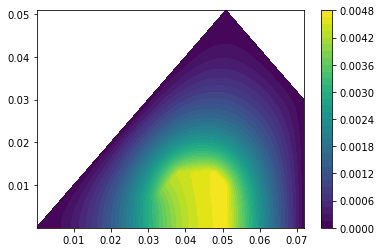

In [51]:
fspace = tt_iga.Function(basis_solution+basis_param)
fspace.dofs = dofs_tt.round(1e-10)

plt.figure()
y1, y2 = basis_solution[0].collocation_points(3)[0], basis_solution[1].collocation_points(3)[0]
w1, w2 = basis_solution[0].collocation_points(3)[1], basis_solution[1].collocation_points(3)[1]
ws = np.einsum('i,j->ij',w1,w2)
X1,X2 = geom([y1,y2]+[tn.tensor([0.0])]*4)
u = fspace([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*4)
plt.contourf(X1.numpy().squeeze(), X2.numpy().squeeze(),u.numpy().squeeze(),levels=32)
plt.colorbar()

import pickle
dct = {'x1' : X1.numpy().squeeze(), 'x2' : X2.numpy().squeeze(), 'u' : u.numpy().squeeze(), 'ws' : ws}

    
u = fspace([tn.tensor([0.05]),tn.tensor([0.0]), tn.linspace(-0.001,0.001,6),tn.linspace(-0.001,0.001,6),tn.linspace(-0.001,0.001,6), tn.linspace(-0.001,0.001,6)])

def get_in_reference(x, param1):
    return 0.4*x/(3.27640e-2+param1*0)
    # return 0.1*x/(geom([tn.tensor([0.1]),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([param1]), tn.tensor([0.0])])[0].numpy().squeeze())




In [52]:
# y1, y2 = np.linspace(0,1,32), np.linspace(0.,1,32)
# 
# grad1, grad2 = geom.gradient_physical(basis_solution, fspace)
# 
# g2 = -grad1([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
# g1 = grad2([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
# x1,x2 = geom([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*4)
# 
# plt.figure()
# plt.quiver(x1.numpy().flatten(),x2.numpy().flatten(),g1.numpy().flatten(),g2.numpy().flatten(),np.sqrt(g1.numpy().flatten()**2+g2.numpy().flatten()**2))
# plt.colorbar()
# 
# x1B, x2B = geom([get_in_reference(tn.linspace(0,0.01,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]),tn.tensor([0.0])])
# 
# dct['x1B'] = x1B.numpy().squeeze()
# dct['x2B'] = x2B.numpy().squeeze()
# 
# g2 = -grad1([get_in_reference(tn.linspace(0,0.01,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]),tn.tensor([0.0]), tn.tensor([0.0])]).numpy().flatten()
# g1 = grad2([get_in_reference(tn.linspace(0,0.01,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]),tn.tensor([0.0]), tn.tensor([0.0])]).numpy().flatten()
# 
# dct['B1'] = g1
# dct['B2'] = g2
# 
# with open('quad_nominal.pkl','wb') as f:
#     pickle.dump(dct, f)

In [55]:
import pickle
with open(r"measurements2.pkl", "rb") as input_file:
    data = pickle.load(input_file)
x_positions = tn.tensor(data['x_positions'])

np.random.seed(1234)

print(x_positions)
print(data['A'])
A_noise = data['A'] + np.random.normal(0,1e-6*5,size = data['A'].shape)
print(A_noise)

print(fspace([get_in_reference(x_positions,0), tn.tensor([0])] +4*[tn.tensor([0])]).numpy().flatten())
print('err',np.abs(fspace([get_in_reference(x_positions,0), tn.tensor([0])] +4*[tn.tensor([0])]).numpy().flatten() - data['A'])/np.max(np.abs(data['A'])) )


tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080, 0.0100, 0.0120, 0.0140, 0.0160])
[-8.86502117e-15  1.35307862e-05  5.41231869e-05  1.21777168e-04
  2.16492447e-04  3.38266789e-04  4.87088973e-04  6.62917265e-04
  8.65626845e-04]
[2.35717581e-06 7.57590773e-06 6.12867217e-05 1.20213909e-04
 2.12889503e-04 3.42702604e-04 4.91386915e-04 6.59734647e-04
 8.65705326e-04]
[1.00538932e-12 1.35307065e-05 5.41231157e-05 1.21777063e-04
 2.16492297e-04 3.38266661e-04 4.87088773e-04 6.62916206e-04
 8.65623968e-04]
err [1.17169927e-09 9.20638816e-08 8.22248374e-08 1.21204722e-07
 1.73895944e-07 1.48817193e-07 2.30950327e-07 1.22311977e-06
 3.32253981e-06]


In [60]:
sigma_noise = 1e-6*5

fspace_mod = fspace[:,0,:,:,:,:]
fspace_mod.dofs = fspace_mod.dofs.round(1e-11)

def likelihood_handle(params):

    s = tn.zeros((params.shape[0],))

    for k in range(len(x_positions)):
        argz = tn.hstack((tn.reshape(get_in_reference(x_positions[k],params[:,1]),[-1,1]), params))
        A = fspace_mod(argz)

        s = s + (A - A_noise[k])**2
    return tn.exp(-0.5/sigma_noise**2 * s)/(2*np.pi*sigma_noise)**2
        




def prior_handle(params):
    # return tn.ones((params.shape[0],))
    alpha = 5
    beta = 5
    scale = lambda p,v: (p+v)/2/v
    p1 = scale(params[:,0], var1)**(alpha-1)*(1-scale(params[:,0], var1))**(beta-1)
    p2 = scale(params[:,1], var2)**(alpha-1)*(1-scale(params[:,1], var2))**(beta-1)
    p3 = scale(params[:,2], var3)**(alpha-1)*(1-scale(params[:,2], var3))**(beta-1)
    p4 = scale(params[:,3], var4)**(alpha-1)*(1-scale(params[:,3], var4))**(beta-1)
    return p1*p2*p3*p4
    #return tn.exp(-1/(2*var*var)*(params[:,0]**2+params[:,1]**2+params[:,2]**2+params[:,3]**2))

def posterior_handle(params):
    print(params.shape)
    return prior_handle(params)* likelihood_handle(params)#+1e-101*(params[...,0]+params[...,1]+params[...,2]+params[...,3])
    # return tn.tensor(list(map((post), list(params))))




In [61]:

import TTCME

basis = [TTCME.basis.BSplineBasis(50,[-var1,var1],2), TTCME.basis.BSplineBasis(25,[-var2,var2],2), TTCME.basis.BSplineBasis(25,[-var3,var3],2), TTCME.basis.BSplineBasis(25,[-var4,var4],2)]
xs = tntt.meshgrid([tn.tensor(b.interpolation_pts[0]) for b in basis])
Ms = tntt.rank1TT([tn.linalg.inv(tn.tensor(b.interpolation_pts[1]).t()) for b in basis])

#paramz = tn.hstack(( tn.reshape(xs[0].full(),[-1,1]) , tn.reshape(xs[1].full(),[-1,1]) , tn.reshape(xs[2].full(),[-1,1]) , tn.reshape(xs[3].full(),[-1,1]) ))

#vals = tn.reshape(posterior_handle(paramz), [b.dim for b in basis])

#posterior_pdf = TTCME.pdfTT(basis, variable_names= ['theta1', 'theta2', 'theta3', 'theta4'], dofs = Ms @ tntt.TT(vals,eps = 1e-12))
posterior_pdf = TTCME.pdfTT.interpoalte(posterior_handle, basis, variable_names=['theta1', 'theta2', 'theta3', 'theta4'])
print(posterior_pdf)
# 
prior_pdf = TTCME.pdfTT.interpoalte(prior_handle, basis, variable_names=['theta1', 'theta2', 'theta3', 'theta4'])

torch.Size([2500, 4])
torch.Size([22500, 4])
torch.Size([8125, 4])
torch.Size([8125, 4])
torch.Size([101250, 4])
torch.Size([21250, 4])
torch.Size([21250, 4])
torch.Size([101250, 4])
torch.Size([10625, 4])
torch.Size([10625, 4])
torch.Size([101250, 4])
torch.Size([20000, 4])
Probability density function:
p(theta1,theta2,theta3,theta4)

Basis:
B-spline basis defined on [-0.00075, 0.00075] and dimension 50
B-spline basis defined on [-0.00075, 0.00075] and dimension 25
B-spline basis defined on [-0.00075, 0.00075] and dimension 25
B-spline basis defined on [-0.00075, 0.00075] and dimension 25

DoF:
TT with sizes and ranks:
N = [50, 25, 25, 25]
R = [1, 18, 16, 9, 1]

Device: cpu, dtype: torch.float64
#entries 11925 compression 0.015264



In [62]:
posterior_pdf.normalize()

E = posterior_pdf.expected_value()
C = posterior_pdf.covariance_matrix()
V = np.diag(C)

print()
print('Exact parameters:                 ',[0,0,0,0])
print('')
print('Expected value computed posterior ' ,E)
print('Coariance computed posterior      ' ,C)

E = prior_pdf.expected_value()
C = prior_pdf.covariance_matrix()
V = np.diag(C)

print('')
print('Expected value prior              ' ,E)
print('Variance prior                    ' ,V)



Exact parameters:                  [0, 0, 0, 0]

Expected value computed posterior  [tensor(-5.7878e-06), tensor(5.7875e-06), tensor(-5.6034e-09), tensor(6.5763e-09)]
Coariance computed posterior       tensor([[ 2.2065e-09, -5.5144e-09, -8.5543e-11, -1.1062e-10],
        [-5.5144e-09,  5.0594e-08, -7.0525e-12, -9.4531e-12],
        [-8.5543e-11, -7.0525e-12,  5.1138e-08, -1.2499e-13],
        [-1.1062e-10, -9.4531e-12, -1.2499e-13,  5.1138e-08]])

Expected value prior               [tensor(2.0866e-20), tensor(6.9036e-21), tensor(1.8408e-20), tensor(3.9599e-20)]
Variance prior                     [5.11364180e-08 5.11384162e-08 5.11384162e-08 5.11384162e-08]


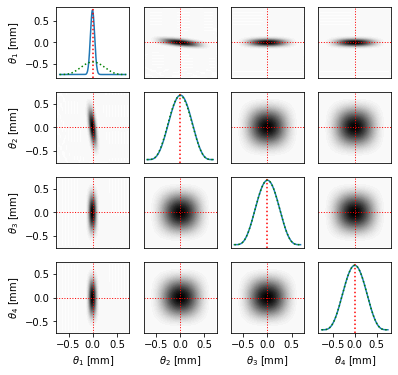

In [63]:


plt.figure(figsize = [6,6])
true_parameters = [0.0]*4
k = 0
for i in range(4):
    for j in range(4):
        k += 1
        if i==j:
            plt.subplot(4, 4, k)
            
            theta = np.linspace(basis[i].domain[0], basis[i].domain[1],1000)
            pr = prior_pdf.marginal([k for k in range(4) if i!=k])[theta].numpy()
            po = posterior_pdf.marginal([k for k in range(4) if i!=k])[theta].numpy()
           
            plt.plot(1e3*theta,1e3*(po/np.max(po)*(np.max(theta)-np.min(theta))+np.min(theta)))
            plt.axvline(true_parameters[i],c='r',linestyle=':')
            plt.plot(1e3*theta,1e3*(pr/np.max(po)*(np.max(theta)-np.min(theta))+np.min(theta)),'g:')
            
        else:
            plt.subplot(4, 4, k)
             
            if j<i: 
                theta1 = np.linspace(basis[j].domain[0], basis[j].domain[1], 127)
                theta2 = np.linspace(basis[i].domain[0], basis[i].domain[1], 128)
                
                T1, T2 = np.meshgrid(theta1, theta2)
                po = posterior_pdf.marginal([k for k in range(4) if i!=k and j!=k])
                po.normalize()
                po = po[theta1,theta2].numpy().T
                plt.contourf(1e3*T1, 1e3*T2, po, cmap='gray_r', levels =64)
                plt.axvline(1e3*true_parameters[j],c='r',linestyle=':',linewidth=1)
                plt.axhline(1e3*true_parameters[i],c='r',linestyle=':',linewidth=1)
            else: 
                theta1 = np.linspace(basis[i].domain[0],basis[i].domain[1],127)
                theta2 = np.linspace(basis[j].domain[0],basis[j].domain[1],128)
                
                T1, T2 = np.meshgrid(theta1, theta2)
                po = posterior_pdf.marginal([k for k in range(4) if i!=k and j!=k])
                po.normalize()
                po = po[theta1,theta2].numpy().T
                plt.contourf(1e3*T2, 1e3*T1, po, cmap='gray_r', levels =64)
                plt.axvline(1e3*true_parameters[j],c='r',linestyle=':',linewidth=1)
                plt.axhline(1e3*true_parameters[i],c='r',linestyle=':',linewidth=1)
        
        if i==3: plt.xlabel(r'$\theta_'+str(j+1)+'$ [mm]')
        if j==0: plt.ylabel(r'$\theta_'+str(i+1)+'$ [mm]')
        
        if j>0: plt.yticks([])
        if i<3: plt.xticks([])

plt.savefig('quad_posterior1.pdf')
tikzplotlib.save('quad_posterior1.tex')

In [64]:
print('Rank solution ', dofs_tt.round(1e-10).R)
print('Storage solution ', tntt.numel(dofs_tt.round(1e-10))*8/1e6)


Rank solution  [1, 63, 145, 130, 51, 8, 1]
Storage solution  6.781056


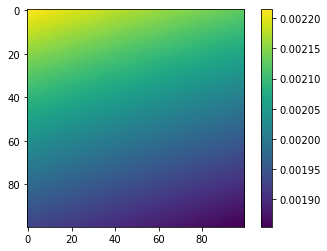

In [67]:
post = fspace_mod([tn.tensor([0.3]), tn.linspace(-var1,var1,100),tn.linspace(-var2,var2,100),tn.tensor([0]), tn.tensor([0])])
plt.imshow(post.numpy().squeeze())
plt.colorbar()

In [66]:
Dc = 3.27640e-2                                                           
# Dc = 32e-3
# hc = 7e-3
hc = 7.55176e-3                                                           
ri = 20e-3                                                           
                                                         
rm = ((Dc+var2)**2+hc*hc-(ri+var1)**2)/((Dc+var2)*np.sqrt(2)+hc*np.sqrt(2)-2*(ri+var1))                 


O = np.array([rm/np.sqrt(2),rm/np.sqrt(2)])

xc = geom([tn.linspace(0,0.4,10000),tn.tensor([0.3]), tn.tensor([var1]), tn.tensor([var2]), tn.tensor([var3]), tn.tensor([-var4])])[0].numpy().squeeze()
yc = geom([tn.linspace(0,0.4,10000),tn.tensor([0.3]), tn.tensor([var1]), tn.tensor([var2]), tn.tensor([var3]), tn.tensor([-var4])])[1].numpy().squeeze()
print(np.std(np.sqrt((xc-O[0])**2+(yc-O[1])**2)))

0.00023742787347768877
